In [84]:
import os
import sys
import numpy as np
import math
import copy
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [85]:
sys.path.insert(0, '..')

In [50]:
DATAPATH ='/home/swei20/SymNormSlidingWindows/out/randn100.csv'

In [12]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out/'
FILE = 'trff_sport_1010_21:08.csv'
path = os.path.join(DATADIR, FILE)

In [142]:
from util.plot import get_pd

In [218]:
def get_path(filename,DATADIR=DATADIR):
    return os.path.join(DATADIR, filename)
def get_pd(filename, mLoop=True):
    ftr = filename.split('_')[1]
    path = get_path(filename)    
    out = pd.read_csv(path)
    if mLoop:
        plot_error(out, ftr)  
    else:
        plot_size_error(out, ftr)
    return out
def plot_error(out, ftr, cols=['errUn','errCs'], labels=['uniform','sketch']):
    for i, col in enumerate(cols): 
        plt.scatter(np.log10(out['m']), out[col], label = f'{labels[i]}')
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel('error')
    plt.xlabel('log stream size')
    plt.title(f'CAIDA {ftr}')
def plot_size_error(out, ftr):
    rList = out['r'].unique()
    colors = cm.get_cmap('viridis')(np.linspace(1,0,len(rList)))
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        plt.scatter(outR['cr'], outR['errCs'], color = colors[i] ,label=f'r={r}')
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel('error')
    plt.xlabel('log sketch size')
    plt.title(f'CAIDA {ftr}')

In [209]:
plt.style.use(['ieee','no-latex'])

In [147]:
filename = '/out/trff_sport__csL_1011_01:23.csv'

In [149]:
filename.split('_')[1]

'sport'

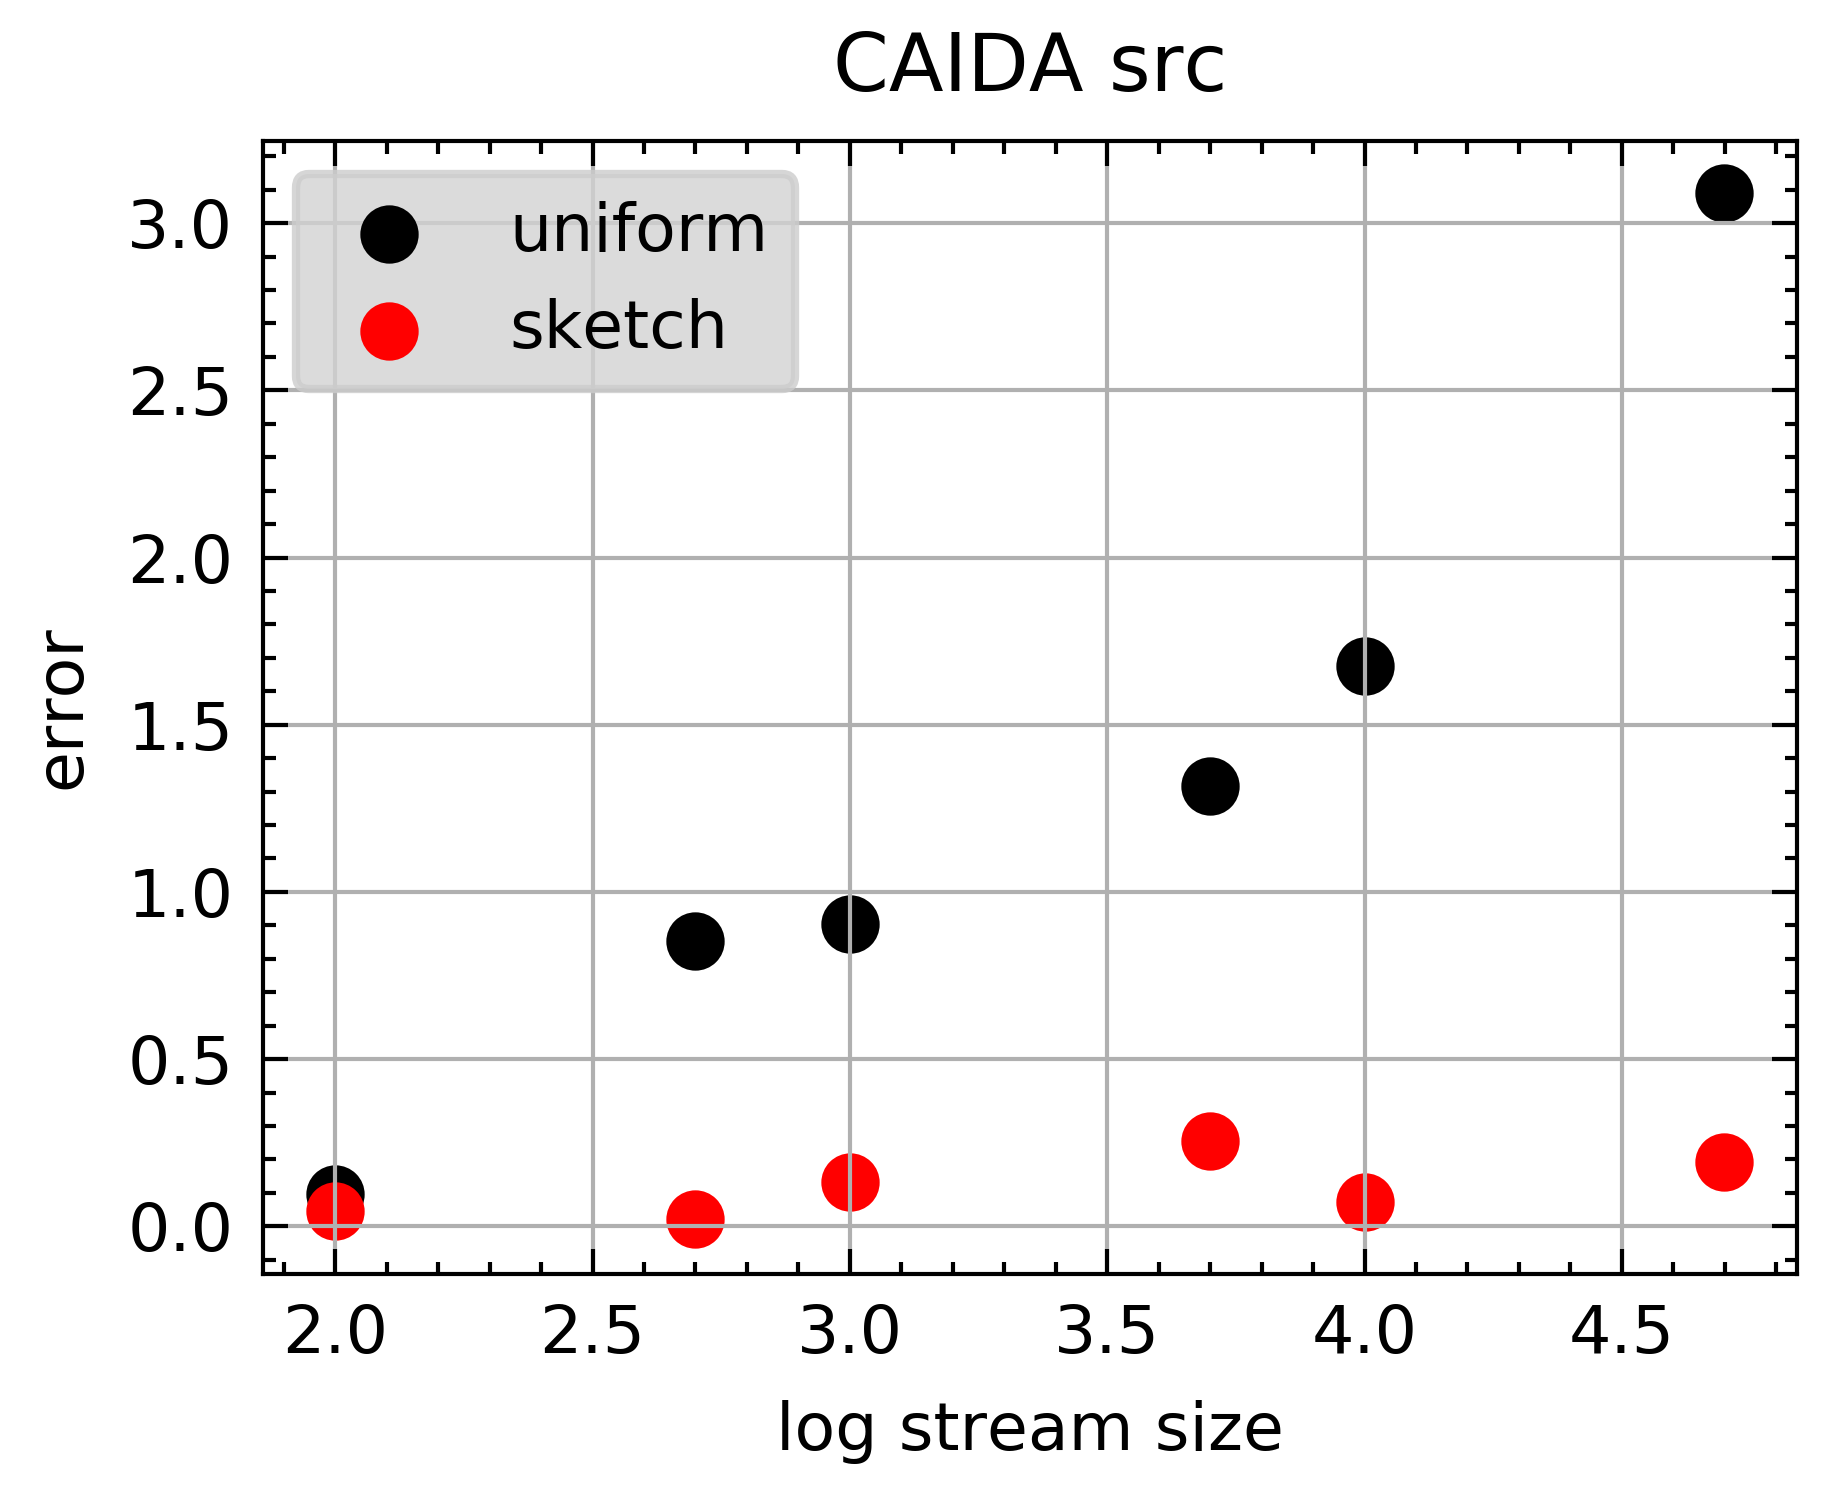

In [219]:
out2 = get_pd('trff_src__mL_c1024_1011_16:06.csv', mLoop=True)

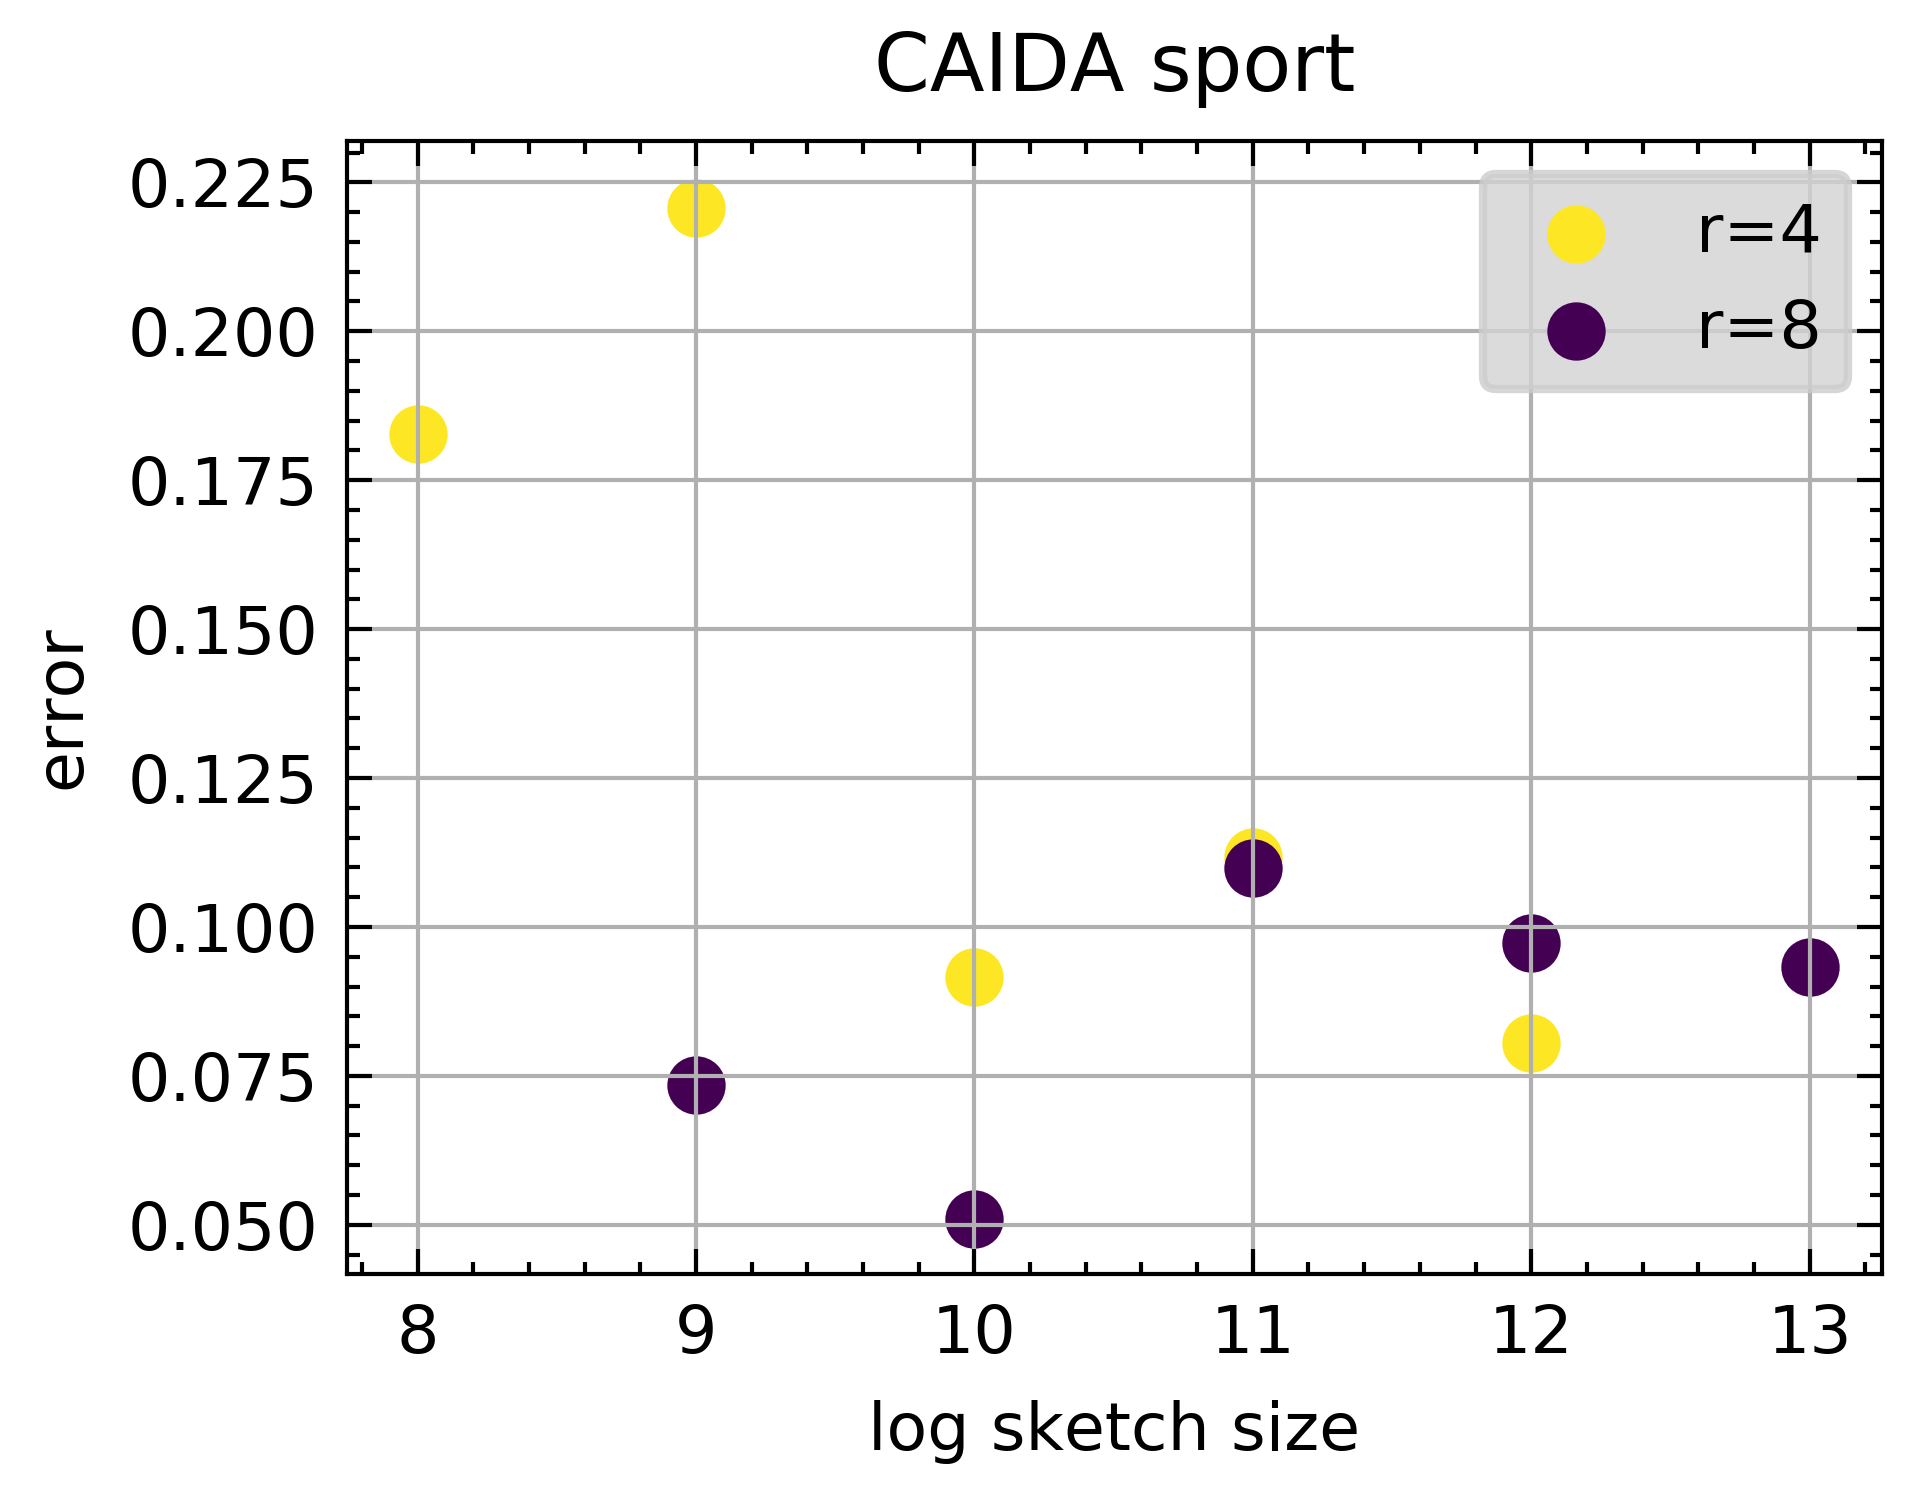

In [183]:
out3 = get_pd('trff_sport__csL_1011_01:23.csv', mLoop=False)